#### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [2]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.isnull()

,Survived,Age,Fare
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
886,False,False,False
887,False,False,False
888,False,True,False
889,False,False,False


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [7]:
df['Age'].isnull().sum()

177

In [8]:
df['Age'].dropna().sample() #It will random sample(Values) which are not NaN when we run everytime.

595    36.0
Name: Age, dtype: float64

In [9]:
df.iloc[190]

Survived     1.0
Age         32.0
Fare        13.0
Name: 190, dtype: float64

In [10]:
#Example for ur understanding. It will give diff random values which are not NaN values.
#Evry time we run it will give diff values.
import pandas as pd
import numpy as np

# np.random.seed(2)
dff = pd.DataFrame({'Age': [25, np.nan, 30, 22, np.nan, 35]})

print(dff['Age'].dropna().sample())


0    25.0
Name: Age, dtype: float64


In [11]:
import pandas as pd
import numpy as np

np.random.seed(2)
dff = pd.DataFrame({'Age': [25, np.nan, 30, 22, np.nan, 35]})

print(dff['Age'].dropna().sample())


3    22.0
Name: Age, dtype: float64


In [12]:
import pandas as pd
import numpy as np

np.random.seed(1) #you can absolutely give any number instead of 1 inside the seed parameter of np.random.seed().  In fact, any unique integer value can be used as a seed.
dff = pd.DataFrame({'Age': [25, np.nan, 30, 22, np.nan, 35]})

print(dff['Age'].dropna().sample())


5    35.0
Name: Age, dtype: float64


In [13]:
import pandas as pd
import numpy as np

np.random.seed(6) # Yes, you can absolutely give any number instead of 6 inside the seed parameter of np.random.seed().  In fact, any unique integer value can be used as a seed.
dff = pd.DataFrame({'Age': [25, np.nan, 30, 22, np.nan, 35]})

print(dff['Age'].dropna().sample())


0    25.0
Name: Age, dtype: float64


In [14]:
df['Age'].isnull().sum()

177

In [15]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0) #Overall it will select Non NaN values and it will print 177 random values coz we selected 177 inside the sample().

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [16]:
print(df.iloc[5])
print(df.iloc[423])

Survived    0.0000
Age            NaN
Fare        8.4583
Name: 5, dtype: float64
Survived     0.0
Age         28.0
Fare        14.4
Name: 423, dtype: float64


In [17]:
df[df['Age'].isnull()].index #It gives the indexes which are having NaN values.

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [18]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [19]:
df.Age.median() #Here we can use mean() also. We used Median coz probably there may be some outliers so that particular outliers will be removed

28.0

In [20]:
median=df.Age.median()

In [21]:
median

28.0

In [22]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample  

In [23]:
impute_nan(df,"Age",median)

In [24]:
df #All NaN values in Age_random are filled with random_sample values.

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [25]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

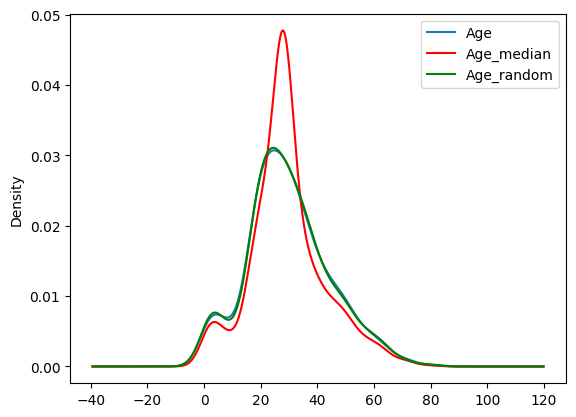

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

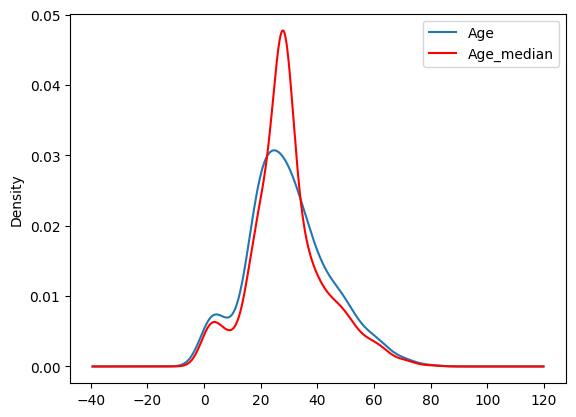

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

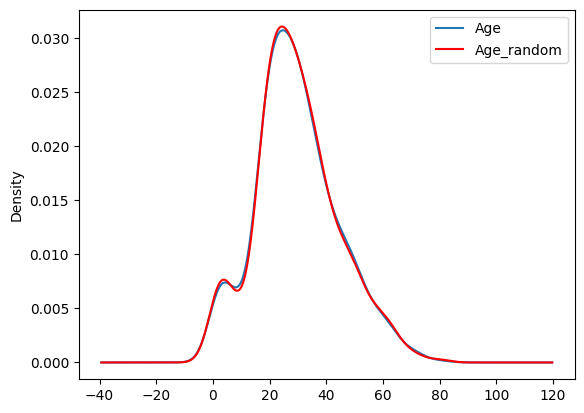

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_random.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
#In previous both 'Age' & 'Age_median' have distorted.
#With mean or median the variance gets distorted.
#See the distribution btw 'Age' and 'Age_random' both are almost similar.
#The main advantage is distortion is not happening like previous.
#Now we have done previously mean/median/mode imputation and now we have done Random Sample Imputaion.
#Random Sample imputation is definetly working with a slight diff in the variance  w.r.t 'Age' &'Age_random' where as w.r.t 'Age' & 'Age_median' it is a lot of problem coz there is a lot of distortion(Variance).  

##### Advantages
1. Easy To implement
2. There is less distortion in variance

##### Disadvantage
1. Every situation randomness wont work

##### Capturing NAN values with a new feature

It works well if the data are not missing completely at random 

In [30]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [31]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [33]:
df #See here it is assigned 1 for NaN values and for non NaN values 0 is assigned

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [34]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [35]:
df.Age.mean()

29.69911764705882

In [36]:
df.Age.median()

28.0

In [37]:
df['Age'].fillna(df.Age.median(),inplace=True) #Now it is permanantly changed. NaN-->28.0

In [38]:
df.head(10) #U r providing an additional feature 'Age_NAN' to provide importance to that missing values.
 #Model will come to know something 

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Captures the importance of missing values

##### Disadvantages
1. Creating Additional Features(Curse of Dimensionality)

##### Curse of Dimensionality
1. There will some limit for the features. If u cross the threshold or like adding more no of features(As the number increases Exponentially) then the Training model gets confused coz u r feeding with lot of information. Then the model not able to absorb the all that particular info if u add more no of features. Hence the accuracy decreases.
2. So the confusion on particular model after learning w.r.t so many no of features It tends to make the accuracy of that particular model lower.
3. Similarly when we see after that particular threshold point that our features is actually increasing exponentially from 100 to 200 to 1000 to 10k then the accuracy will be decreasing. Hence that is called as 'Curse of Dimensionality'

#### End of Distribution imputation

In [39]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head(30)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [36]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


<Axes: >

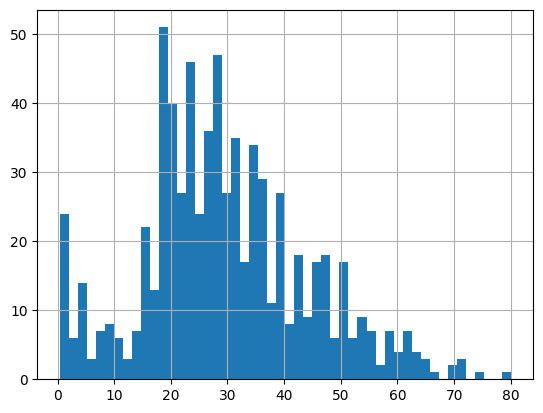

In [40]:
df.Age.hist(bins=50) #Here i will take the end of distribution and try to replace it.

In [41]:
df.Age.mean() #This mean is ntg but central value.
#Now if i want to get far end distribution if u know abt Normal Distribution What we is that I will be taking after 3rd Standard Deviation. 

29.69911764705882

In [42]:
df.Age.median()

28.0

In [43]:
df.Age.mean()+3*df.Age.std() #End of the distribution we r getting 73.27 w.r.t 'Age'
#Whatever present at the end of the distribution in the plus 3 Standard Deviation that particular value Im gng to take it by applying this particular formulae   

73.27860964406094

In [44]:
extreme=df.Age.mean()+3*df.Age.std() #End of the dostribution says tht I have to pick up right end of the distribution data. Basically we take the data to replace all the NaN values.   

In [ ]:
#If u want to see the outliers.

<Axes: xlabel='Age'>

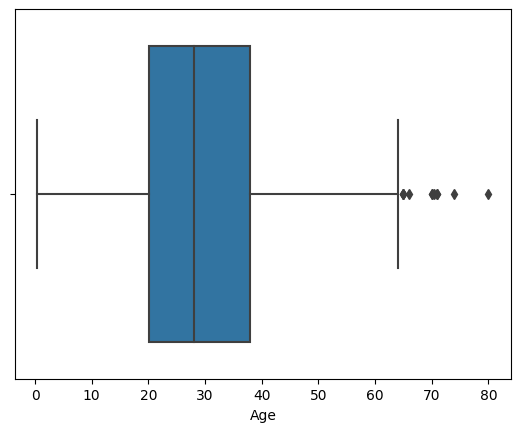

In [45]:
import seaborn as sns
sns.boxplot(x='Age',data=df) #After the right side line those are all outliers.
#We dont have left side outlier. coz in our dataset we dont have Left side Outlier We have only right side outlier.

In [46]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [47]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [48]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [49]:
df #Here we have replaced 'Age' NaN values with 'Median=28.0' & filled NaN values in 'Age_end_distribution' with extreme=73.27861

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,28.0,23.4500,73.27861
889,1,26.0,30.0000,26.00000


In [50]:
df.head(6)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861


<Axes: >

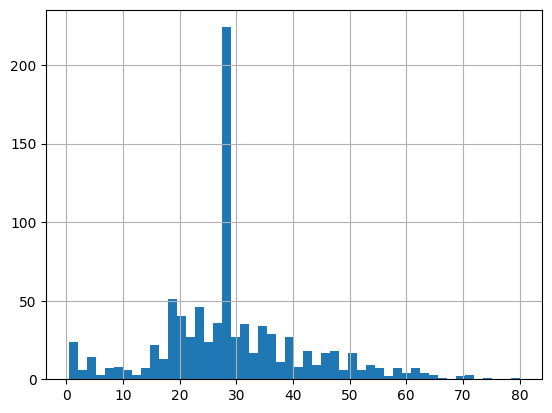

In [51]:
df['Age'].hist(bins=50) #U can see that NaN values are there in the center. It is replaced with the Median.

<Axes: xlabel='Age'>

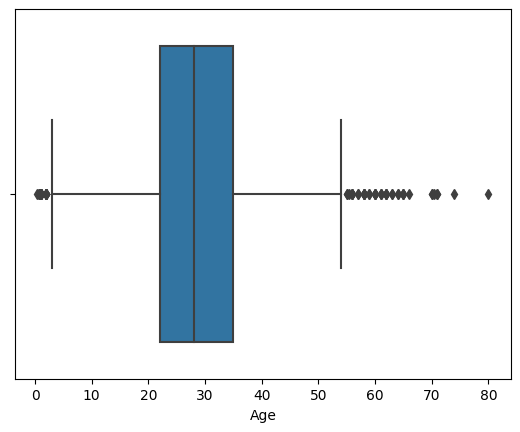

In [52]:
sns.boxplot(x='Age',data=df) #It is showing the outliers on both ends.

<Axes: >

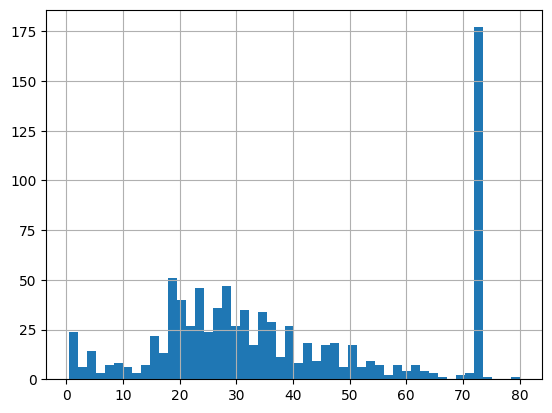

In [51]:
df['Age_end_distribution'].hist(bins=50)

<Axes: xlabel='Age_end_distribution'>

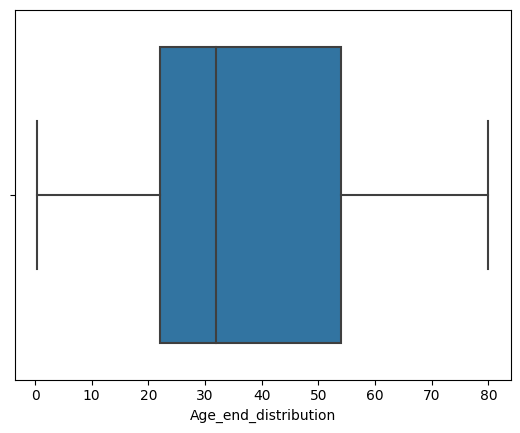

In [53]:
sns.boxplot(x='Age_end_distribution',data=df) #It is not showing the outliers.
#If u want to remove the outliers then u can use End of Imputation

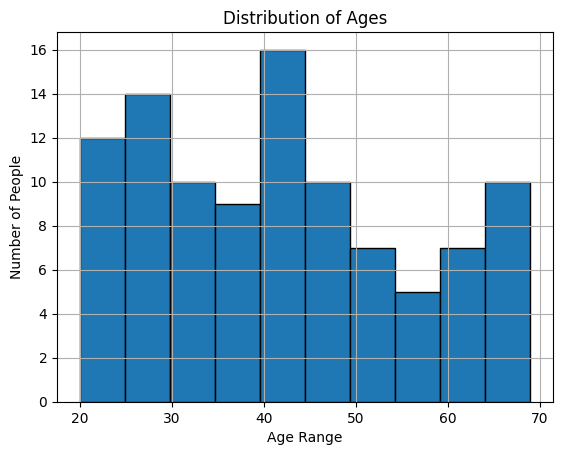

In [54]:
#EXAMPLE

import matplotlib.pyplot as plt
import numpy as np

# Sample age data
ages = np.random.randint(20, 70, size=100)  # Generate 100 random ages between 20 and 69

# Create the histogram with 10 bins
plt.hist(ages, bins=10, edgecolor='black')  # Adjust 'bins' to change the number of bars

# Customize the plot
plt.xlabel('Age Range')
plt.ylabel('Number of People')
plt.title('Distribution of Ages')
plt.grid(True)

# Show the histogram
plt.show()


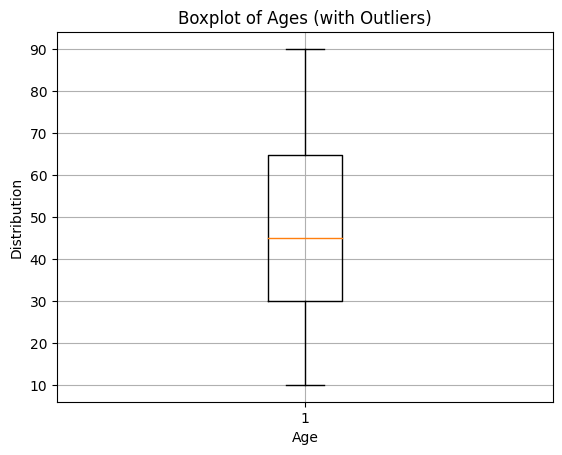

In [55]:
#EXAMPLE
import matplotlib.pyplot as plt
import numpy as np

# Sample age data (including some outliers)
ages = np.random.randint(15, 85, size=100)  # 100 random ages between 15 and 84
ages = np.append(ages, [10, 90])  # Add a few outliers

# Create the boxplot
plt.boxplot(ages)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Boxplot of Ages (with Outliers)')
plt.grid(True)

# Show the plot
plt.show()


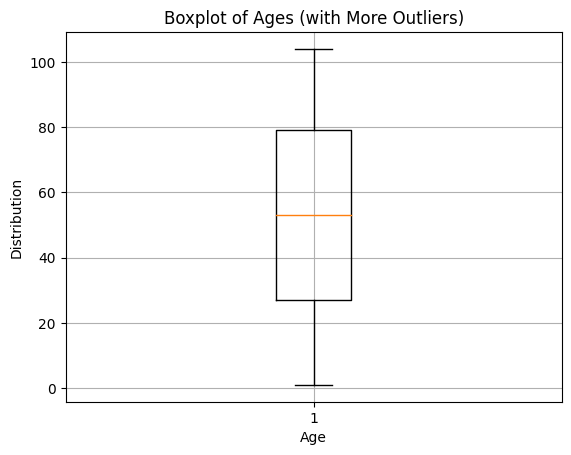

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Sample age data with more outliers
ages = np.random.randint(10, 90, size=100)  # 100 random ages between 10 and 89
outlier_count = 20  # Adjust this value to control the number of outliers
ages = np.append(ages, np.random.randint(1, 5, size=outlier_count))  # Add young outliers
ages = np.append(ages, np.random.randint(95, 105, size=outlier_count))  # Add old outliers

# Create the boxplot
plt.boxplot(ages)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Boxplot of Ages (with More Outliers)')
plt.grid(True)

# Show the plot
plt.show()


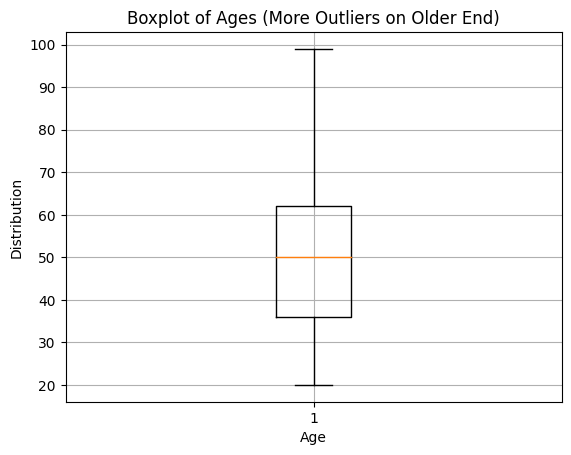

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Sample age data with more outliers on the older end
ages = np.random.randint(20, 70, size=100)  # 100 random ages between 20 and 69
outlier_count = 20  # Adjust this value to control the number of outliers

# Add outliers on the older end (adjust range as needed)
ages = np.append(ages, np.random.randint(80, 100, size=outlier_count))

# Create the boxplot
plt.boxplot(ages)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Boxplot of Ages (More Outliers on Older End)')
plt.grid(True)

# Show the plot
plt.show()
